In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from pandas import DataFrame
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
#from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM, Conv1D, Dense, Flatten, MaxPooling1D, Dropout


df = pd.read_csv('D:\post.csv', encoding = 'utf16')
d=df['review']
d.head()

0    ታዛዥ ነን !!የምንችለውን ሁሉ ለማደረግ። እግዚአብሔር ብቻ ከናንተ ጋር ይሁን
1    ያልከው ሁሉ ያልከው ልክ ነይ በአላህ እገዛ ሁሉም ለሀገራችን ጥሩን እመኛለሁ።
2        የዘመኑ ጀግና እና ማዕበሉን የምታሻግር የድርሻውን የሚወጣ አንበሳ ነህ።
3                  ድል ከእውነተኛው ተባዳዮች ጋር ናት ጀግናዬ ነህ ዐቢቹ።
4          ፈጣሪ ይርዳን በተለይ እንደ አማራ ህዝብ በጣም አሳሳቢ እየሆነ ነው 
Name: review, dtype: object

In [2]:
class normalize(object):
    expansion_file_dir='' # assume you have file with list of short forms with their expansion as gazeter
    short_form_dict={}
    # Constructor
    def __init__(self):
       self.short_form_dict=self.get_short_forms()
        

    def get_short_forms(self):
         text=open(self.expansion_file_dir,encoding='utf8')
         exp={}
         for line in iter(text):
            line=line.strip()
            if not line:  # line is blank
                continue
            else:
                expanded=line.split("-")
                exp[expanded[0].strip()]=expanded[1].replace(" ",'_').strip()
         return exp
                     

    # method that expand short form file
    def expand_short_form(input_short_word):
        if input_short_word in self.short_form_dict:              
            return self.short_form_dict[input_short_word]
        else:
            return input_short_word

def preprocess(input_token):
 space_pattern = '\s+'
 url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
 '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
 englishword_num ='[a-zA-Z]|[0-9]+'
 AmhPunc='[፤።፡፣:,.?/()•“”*፨]+'
 special_char = "[@#$%^&=?×!,;:_.(){}`'/+*<>\"¤— „\ ®¯™¡¡\x10»€«·‘0e1b§”¬¦…""f÷\~¨©±¥£¶–°•˜’“|]"
 geez_number=' [፩ ፪ ፫ ፬ ፭ ፮ ፯ ፰ ፱ ፲ ፳ ፴ ፵ ፶ ፷ ፸ ፹ ፺ ፻] ' # for removing geez number
 RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
 Clean_text = re.sub(url_regex,'', input_token)
 Clean_text = re.sub(AmhPunc,' ',Clean_text)
 Clean_text=re.sub(special_char,' ',Clean_text)
 Clean_text= re.sub(englishword_num,'',Clean_text)
 Clean_text= re.sub(r'(.)\1+', r'\1\1',Clean_text) #removing elongation in text
 Clean_text = RE_EMOJI.sub(r'', Clean_text)
 Clean_text =re.sub(geez_number,'',Clean_text)
 Clean_text=re.sub('-','',Clean_text)
 Clean_text=re.sub(r'<[^>]*>','', Clean_text)
 Clean_text=re.sub('-',' ',Clean_text)
 Clean_text = Clean_text.replace("\\", "");
 Clean_text = Clean_text.replace("[", "");
 Clean_text = Clean_text.replace("]", "");
 Clean_text = re.sub(space_pattern,' ',Clean_text)
 return Clean_text
def normalize_char_level_missmatch(input_token):
        rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
        rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
        rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
        rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
        rep5=re.sub('[ሕኅ]','ህ',rep4)
        rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
        rep7=re.sub('[ሠ]','ሰ',rep6)
        rep8=re.sub('[ሡ]','ሱ',rep7)
        rep9=re.sub('[ሢ]','ሲ',rep8)
        rep10=re.sub('[ሣ]','ሳ',rep9)
        rep11=re.sub('[ሤ]','ሴ',rep10)
        rep12=re.sub('[ሥ]','ስ',rep11)
        rep13=re.sub('[ሦ]','ሶ',rep12)
        rep14=re.sub('[ዓኣዐ]','አ',rep13)
        rep15=re.sub('[ዑ]','ኡ',rep14)
        rep16=re.sub('[ዒ]','ኢ',rep15)
        rep17=re.sub('[ዔ]','ኤ',rep16)
        rep18=re.sub('[ዕ]','እ',rep17)
        rep19=re.sub('[ዖ]','ኦ',rep18)
        rep20=re.sub('[ጸ]','ፀ',rep19)
        rep21=re.sub('[ጹ]','ፁ',rep20)
        rep22=re.sub('[ጺ]','ፂ',rep21)
        rep23=re.sub('[ጻ]','ፃ',rep22)
        rep24=re.sub('[ጼ]','ፄ',rep23)
        rep25=re.sub('[ጽ]','ፅ',rep24)
        rep26=re.sub('[ጾ]','ፆ',rep25)
        #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
        rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
        rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
        rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
        rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
        rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
        rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
        rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
        rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
        rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
        rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
        rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
        rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
        rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
        rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
        rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
        rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
        rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
        rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
        rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
        rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
        rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
        rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
        return rep48

df['nreview'] = d.apply(preprocess)
#df['nreview'] =df['nreview'].apply(normalize_char_level_missmatch)

X = []
sentences = list(df['nreview'] )
for sen in sentences:
    #print(sen)
    X.append(normalize_char_level_missmatch(sen))
y = df['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print(X_train[1])
tokenizer = Tokenizer(num_words=1500)

tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

X_test = tokenizer.texts_to_sequences(X_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 20



እባክዎ ይብቃ ወደ ልቦናዎ ይመለሱ ያለቁት ህፃናት ደም ይፋረዳል እጅዎን ሰጥተው


In [5]:
X_train = pad_sequences(X_train, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='pre', maxlen=maxlen)
print(X_train)

[[   0    0    0 ...   39   58   15]
 [   0    0    0 ...   29  159   52]
 [   0    0    0 ...    1   25  160]
 ...
 [   0    0    0 ...   27 1170   88]
 [   0    0    0 ...  272   45  191]
 [   0    0    0 ...   64  151   94]]


In [4]:
X_train = pad_sequences(X_train, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='pre', maxlen=maxlen)
from numpy import array
from numpy import asarray
from numpy import zeros


embeddings_dictionary = dict()
glove_file = open('D:/word2vec.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()
# print(embeddings_dictionary)
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
#     print(word, index)
    embedding_vector = embeddings_dictionary.get(word)
#     print(embedding_vector)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#print(embedding_matrix)  


In [8]:
from keras.layers.recurrent import LSTM
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import RMSprop
#from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
embedding_size = 32
# Build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1))))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
#adam = Adam(learning_rate=0.01)
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy', Precision(), Recall()])
print(model.summary())
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split=0.1)
#score = model.evaluate(X_test, y_test, verbose=1)
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
#print('Train: %.3f, Test: %.3f' % (test_acc[1]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            457056    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20, 128)           49664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 128)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [6]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])
print("Test Precision:", score[2])
print("Test Recall:", score[3])

16/16 [==============================] - 0s 8ms/step - loss: 0.3513 - accuracy: 0.8760 - precision: 0.8423 - recall: 0.9289
Test Loss: 0.3512992262840271
Test Accuracy: 0.8759999871253967
Test Precision: 0.842293918132782
Test Recall: 0.9288537502288818


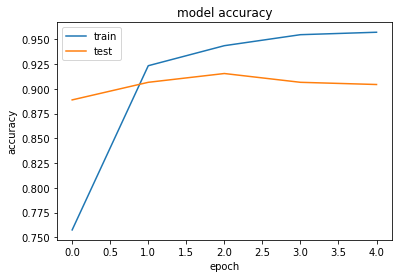

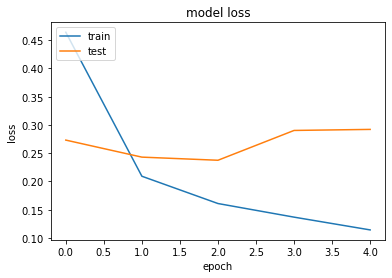

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [175]:
instance = X[190]
print(instance)

ምርጥ ሰዉ


In [176]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.77815294]], dtype=float32)